In [6]:
import s3fs
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [10]:
s3 = s3fs.S3FileSystem(anon=True)


def lookup(path):
    return s3fs.S3Map(path, s3=s3)


date = "20211016"
hour = "21"
var = "TMP"
level = "2m_above_ground"
url1 = (
    "s3://hrrrzarr/sfc/"
    + date
    + "/"
    + date
    + "_"
    + hour
    + "z_anl.zarr/"
    + level
    + "/"
    + var
    + "/"
    + level
)
url2 = (
    "s3://hrrrzarr/sfc/"
    + date
    + "/"
    + date
    + "_"
    + hour
    + "z_anl.zarr/"
    + level
    + "/"
    + var
)
print(url1)
print(url2)

fs = s3fs.S3FileSystem(anon=True)
file1 = s3fs.S3Map(url1, s3=fs)
file2 = s3fs.S3Map(url2, s3=fs)

ds = xr.open_mfdataset([file1, file2], engine="zarr")

airTemp = ds.TMP


x = airTemp.projection_x_coordinate
y = airTemp.projection_y_coordinate


lon1 = -97.5
lat1 = 38.5
slat = 38.5
projData = ccrs.LambertConformal(
    central_longitude=lon1,
    central_latitude=lat1,
    standard_parallels=[slat, slat],
    globe=ccrs.Globe(semimajor_axis=6371229, semiminor_axis=6371229),
)

s3://hrrrzarr/sfc/20211016/20211016_21z_anl.zarr/2m_above_ground/TMP/2m_above_ground
s3://hrrrzarr/sfc/20211016/20211016_21z_anl.zarr/2m_above_ground/TMP


<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
/var/folders/76/y_xscrxs1ws8tqwhzgz8v2c00000gn/T/ipykernel_26699/2222864321.py:19: SyntaxWarning: invalid escape sequence '\c'
  tl1 = str("HRRR 2m temperature ($^\circ$C)")


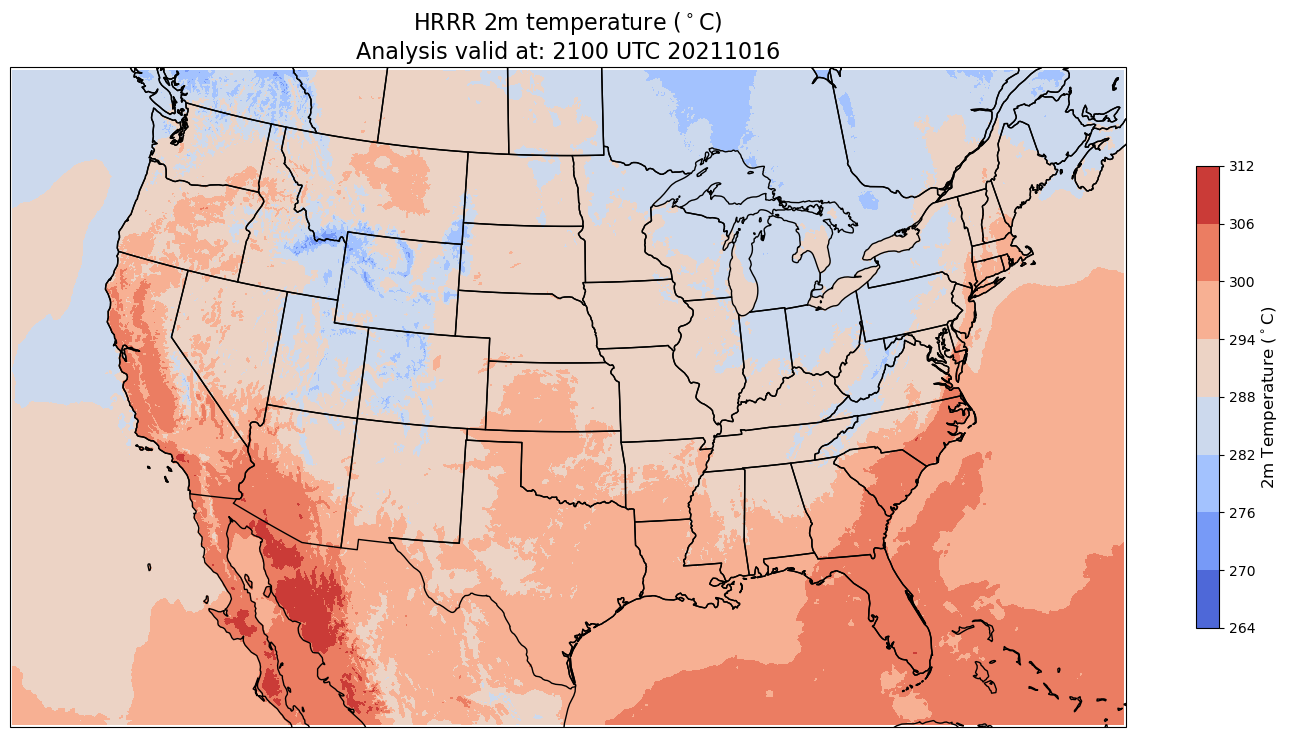

In [13]:
latN = 50.4
latS = 24.25
lonW = -123.8
lonE = -71.2

x = airTemp.projection_x_coordinate
y = airTemp.projection_y_coordinate


res = "50m"

fig = plt.figure(figsize=(18, 12))
ax = plt.subplot(1, 1, 1, projection=projData)
ax.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.add_feature(cfeature.STATES.with_scale(res))

# Add the title
tl1 = str("HRRR 2m temperature ($^\circ$C)")
tl2 = str("Analysis valid at: " + hour + "00 UTC " + date)
plt.title(tl1 + "\n" + tl2, fontsize=16)

# Contour fill
CF = ax.contourf(x, y, airTemp, cmap=plt.get_cmap("coolwarm"))
# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(CF, shrink=0.5)
cbar.set_label(r"2m Temperature ($^\circ$C)", size="large")

In [ ]:
path = "hrrrzarr/sfc/20210101/20210101_00z_fcst.zarr/surface/TMP"
ds = xarray.open_mfdataset([lookup(path), lookup(f"{path}/surface")], engine="zarr")

ds.TMP.plot()

In [10]:
ds["APCP_acc_fcst"].compute()  # .plot()

<xarray.DataArray 'APCP_acc_fcst' (projection_y_coordinate: 1059,
                                   projection_x_coordinate: 1799)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float16)
Coordinates:
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.698e+06 ......
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.587e+06 ......
Attributes:
    GRIB_PARAM:    [2, 0, 1, 8]
    cell_methods:  time: sum
    coordinates:   pressure height forecast_period forecast_reference_time time
    long_name:     surface/APCP_acc_fcst